In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import sys

sys.path.append("../scripts")
from LSTM import PortfolioPredicitionsLSTM_value
from LSTM_utils import compute_errors

# Import des données

In [2]:
titres = {"Amazon": pd.read_csv("../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../data/BRK-B.csv"),
          "Google": pd.read_csv("../data/GOOG.csv"),
          "Microsoft": pd.read_csv("../data/MSFT.csv"),
          "Exxon": pd.read_csv("../data/XOM.csv")}

# Modélisation

In [3]:
LSTM = PortfolioPredicitionsLSTM_value(titres, 
                                       n_steps = 30, 
                                       epochs = 50, 
                                       horizon_prev = 7, 
                                       test_size = 0.5)

In [4]:
predictions, ptf_avg = LSTM.predict_avg_portfolio()

100%|██████████| 5/5 [05:38<00:00, 67.66s/it]


# Split

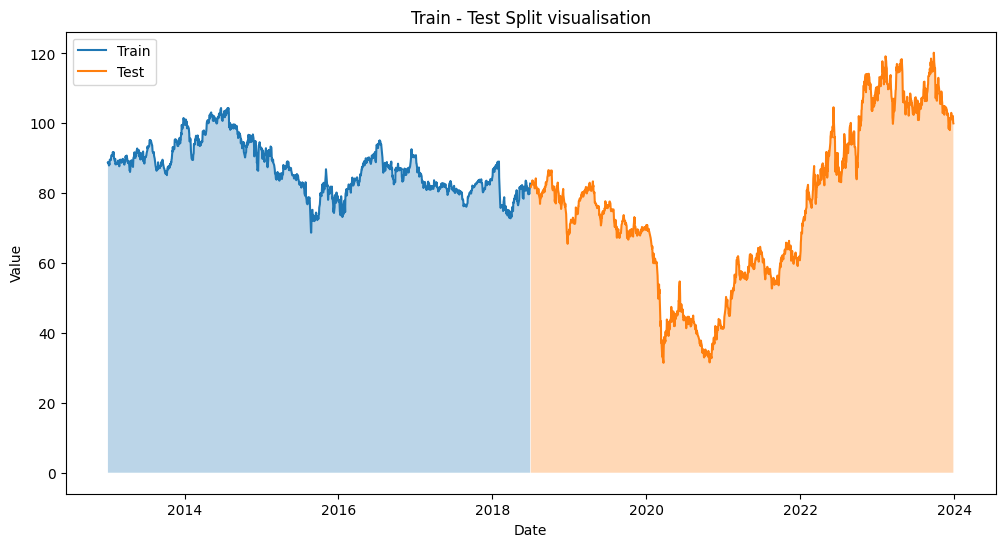

In [17]:
stock = titres["Exxon"]
stock.Date = pd.to_datetime(stock["Date"])

fig = plt.figure(figsize=(12, 6))

plt.plot(stock.Date.iloc[:LSTM.split], stock['Close'].iloc[:LSTM.split], label='Train')
plt.fill_between(stock.Date.iloc[:LSTM.split], stock['Close'].iloc[:LSTM.split], alpha = 0.3)

plt.plot(stock.Date.iloc[LSTM.split:], stock['Close'].iloc[LSTM.split:], label='Test')
plt.fill_between(stock.Date.iloc[LSTM.split:], stock['Close'].iloc[LSTM.split:], alpha = 0.3)

plt.title(f"Train - Test Split visualisation")
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()
plt.show()

# Résultats

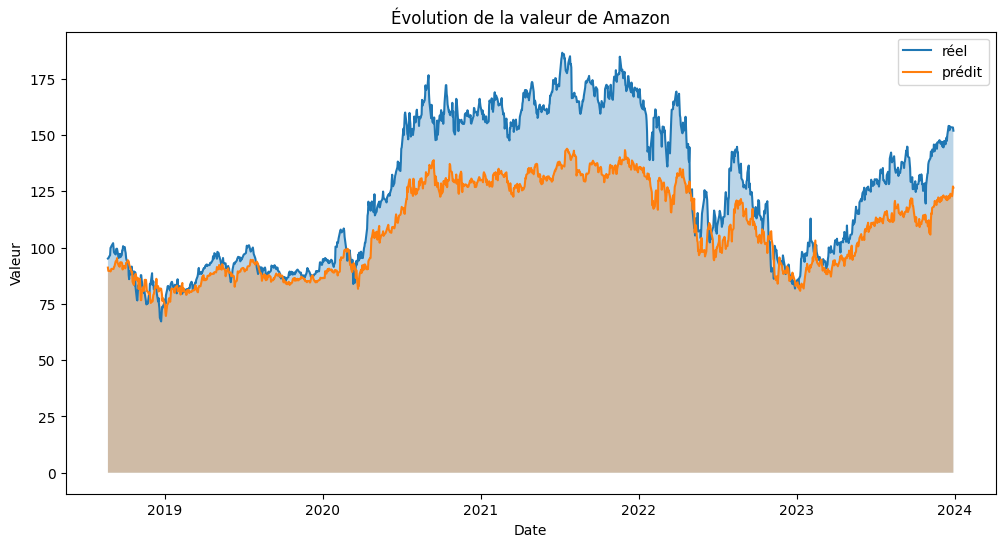

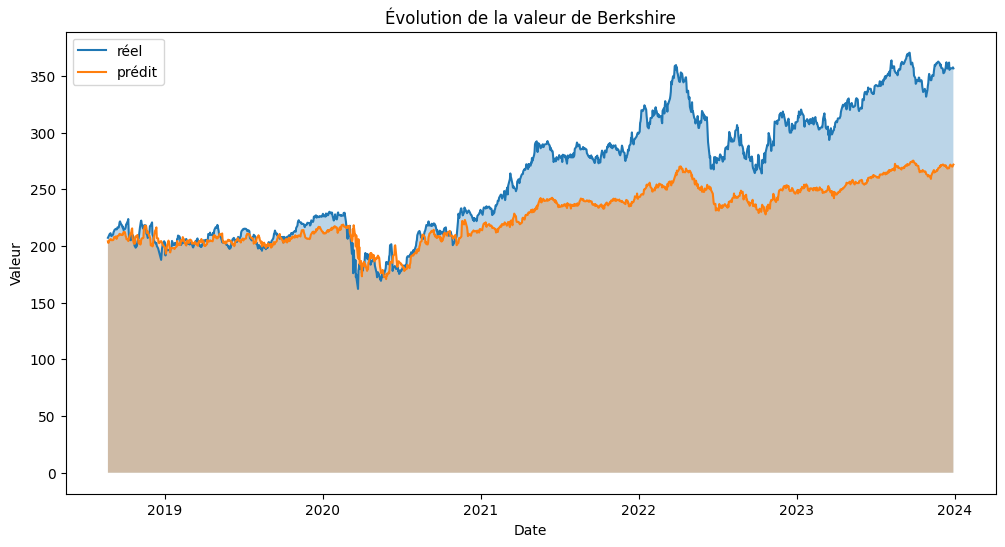

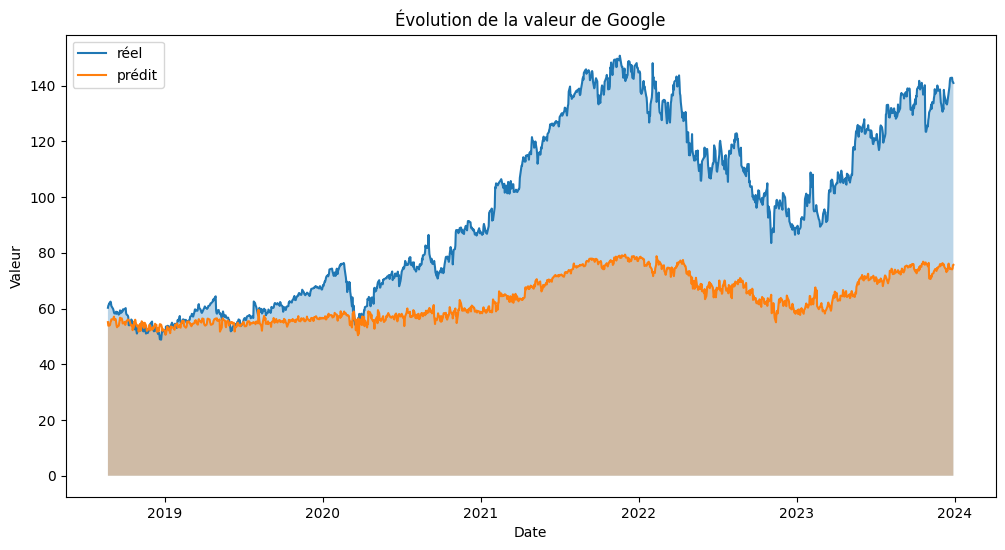

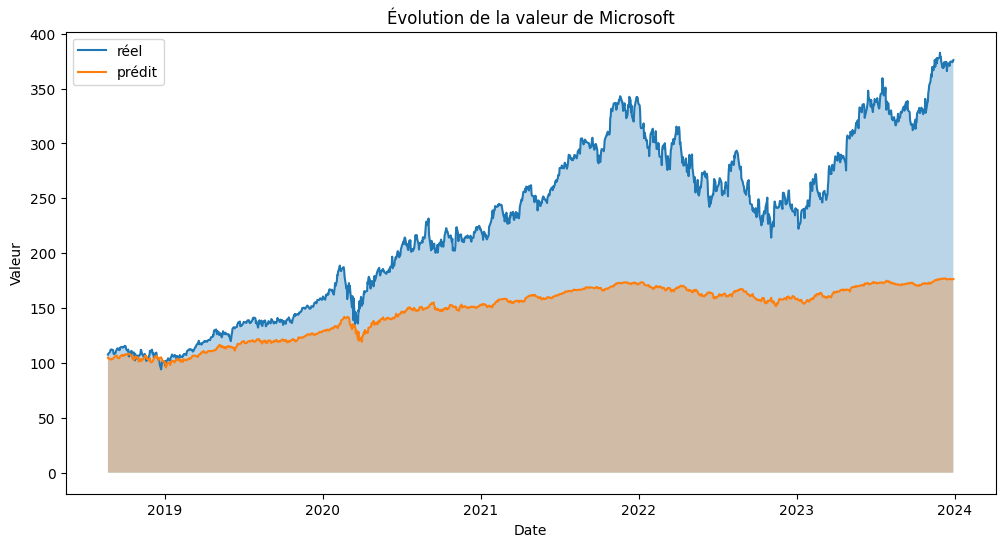

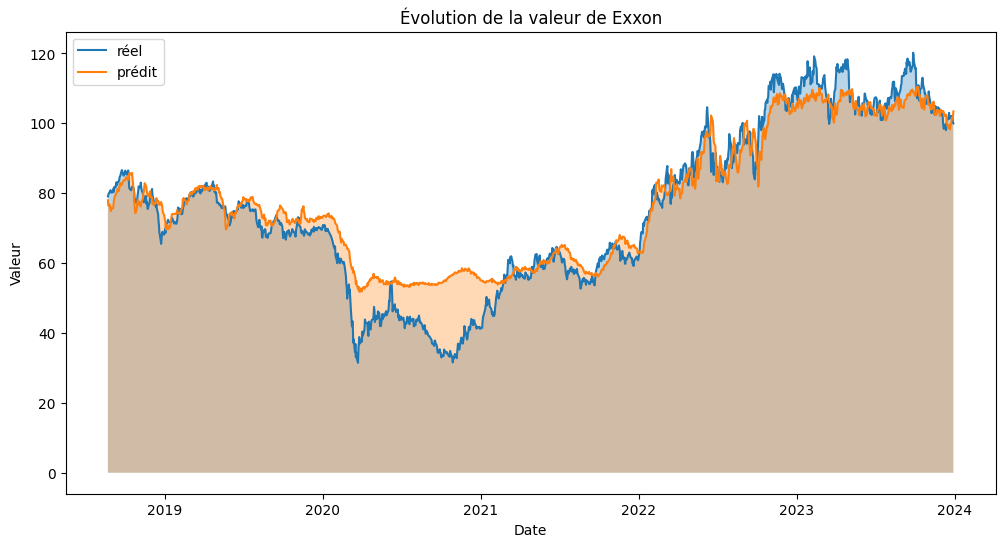

In [8]:
for key, value in predictions.items() :
    fig = plt.figure(figsize=(12, 6))
    
    # Plot the 'Close' values
    plt.plot(value.Date, value['Close'], label='réel')
    plt.fill_between(value.Date, value['Close'], alpha=0.3)
    
    # Plot the 'Prediction' values
    plt.plot(value.Date, value['Prediction'], label='prédit')
    plt.fill_between(value.Date, value['Prediction'], alpha=0.3)
    
    # Set the title and axis labels
    plt.title(f"Évolution de la valeur de {key}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

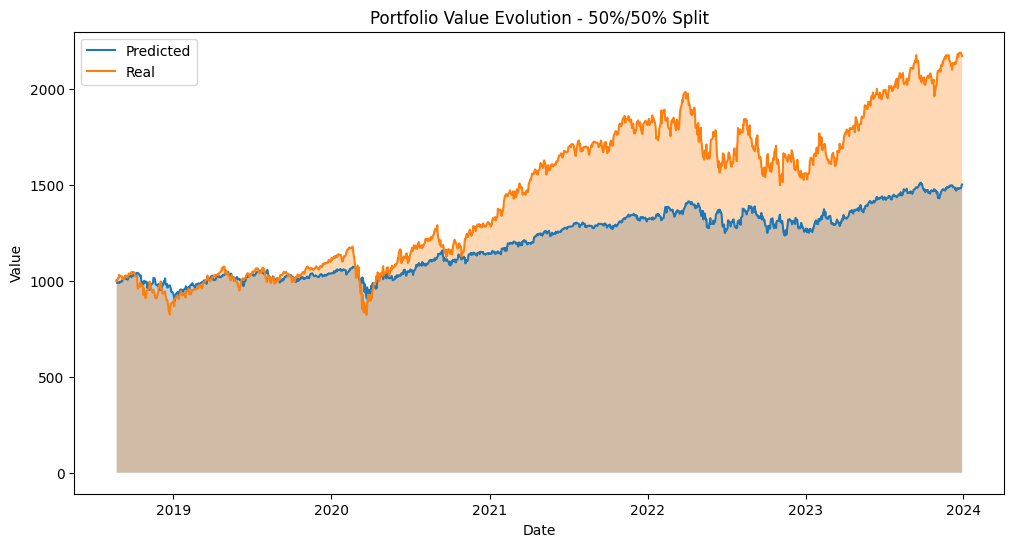

In [5]:
fig = plt.figure(figsize=(12, 6))

plt.plot(ptf_avg.Date, ptf_avg['Predicted_Portfolio_Value'], label='Predicted')
plt.fill_between(ptf_avg.Date, ptf_avg['Predicted_Portfolio_Value'], alpha=0.3)

plt.plot(ptf_avg.Date, ptf_avg['Real_Portfolio_Value'], label='Real')
plt.fill_between(ptf_avg.Date, ptf_avg['Real_Portfolio_Value'], alpha=0.3)

plt.title(f"Portfolio Value Evolution - 50%/50% Split")
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()
plt.show()

# Erreurs

In [10]:
errors = compute_errors(predictions, ptf_avg)

In [11]:
errors

,MSE,RMSE,MAE
Portfolio,114155.866172,337.869599,263.474374
Amazon,460.317225,21.455005,17.165067
Berkshire,2093.034273,45.749692,35.313323
Google,1586.828079,39.835011,32.495793
Microsoft,9418.203606,97.047430,80.246249
Exxon,53.466499,7.312079,5.308717
